# Функции

### Создание

Структура:

```
def имя_функции(параметры):
        """docstring"""
        инструкция1
        инструкция2
        ...
        ...
        return [выражение]
```

In [2]:
def welcome():
    """Эта функция выводит приветствие"""
    print('Welcome!')

return_val = welcome()
print(return_val)



Welcome!
None


### Функция help()

In [3]:
#выводит docstring по передаваемому методу
help(welcome())

Welcome!
Help on NoneType object:

class NoneType(object)
 |  The type of the None singleton.
 |
 |  Methods defined here:
 |
 |  __bool__(self, /)
 |      True if self else False
 |
 |  __eq__(self, value, /)
 |      Return self==value.
 |
 |  __ge__(self, value, /)
 |      Return self>=value.
 |
 |  __gt__(self, value, /)
 |      Return self>value.
 |
 |  __hash__(self, /)
 |      Return hash(self).
 |
 |  __le__(self, value, /)
 |      Return self<=value.
 |
 |  __lt__(self, value, /)
 |      Return self<value.
 |
 |  __ne__(self, value, /)
 |      Return self!=value.
 |
 |  __repr__(self, /)
 |      Return repr(self).
 |
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |
 |  __new__(*args, **kwargs)
 |      Create and return a new object.  See help(type) for accurate signature.



### Параметры функции

In [14]:
def named_welcome(name):
    print(f'Welcome, {name}!')

named_welcome('user')

def num_welcome(name: str):
    print('Welcome, ' + name + '!')

# num_welcome(14)
# ошибка типа
num_welcome('string user')

def multiply_params_fn(name:str, age:int):
    print('Welcome, ' + name + '! Ваш возраст ' + str(age) + ' лет')

# функция с именованными параметрами
multiply_params_fn(name='Vasya', age=19)

Welcome, user!
Welcome, string user!
Welcome, Vasya! Ваш возраст 19 лет
Welcome, Anton Pavlovich Chekhov!


### args в функциях
функция с неизвестным количеством аргументов

In [19]:
def new_welcome(*name_parts):
    message = 'Welcome, ' + name_parts[0] + ' '
    message += name_parts[1] + ' ' + name_parts[2]
    print(message + '!')

new_welcome('Anton', 'Pavlovich', 'Chekhov')
new_welcome('Anton', 'Pavlovich', 'Chekhov', 'Writer') # лишнее игнорируется

Welcome, Anton Pavlovich Chekhov!
Welcome, Anton Pavlovich Chekhov!


### kwargs в функциях

Функция может иметь только один параметр с префиксом **. Он инициализирует новое упорядоченное отображение (словарь), содержащее все оставшееся без соответствующего формального параметра аргументы-ключевые слова.

In [16]:
def welcome(**name_parts):
    print('Welcome, ' + name_parts['first_name'] + ' ' + name_parts['last_name'] + '!')

welcome(last_name='Pupkin', first_name='Vasya')
welcome(last_name='Pupkin', first_name='Vasya', age=133) # лишнее игнорируется
# welcome(last_name='Pupkin') # ошибка - нет всех необходимых параметров

KeyError: 'first_name'

### Функции с дефолтными значениями

In [17]:
def welcome(name:str = 'Anonim'):
    print('Welcome, ' + name + '!')

welcome()
welcome('Vasya')

Welcome, Anonim!
Welcome, Vasya!


### Return функции

In [18]:
def multiply(a:int, b:int):
    return a * b

print(multiply(5, 3))

15


### LEGB - Область видимости

В Python правило LEGB используется для определения порядка поиска пространств имен при разрешении области видимости. Ниже приведен список областей видимости в порядке иерархии (от самой высокой к самой низкой/от самой узкой к самой широкой):

* Локальная переменная (L): определена внутри функции/класса.
* Вложенные (E): Определены внутри вложенных функций (концепция вложенных функций)
* Глобальный (G): определяется на самом верхнем уровне.
* Встроенные (B): Зарезервированные имена во встроенных модулях Python

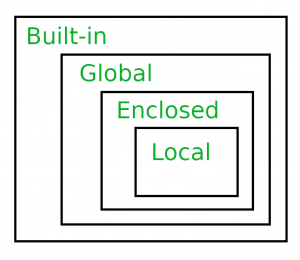

In [20]:
pi = 'outer pi variable'

def print_pi():
    pi = 'inner pi variable'
    print(pi)

print_pi()
print(pi)

inner pi variable
outer pi variable


In [27]:
# вложенная область

pi = 'global pi var'

def outer():
    pi = 'outer pi var'
    # nonlocal pi # а вот так уже не получится
    def inner():
        # pi = 'inner pi var'
        nonlocal pi # берем переменную из области выше
        print(pi)
    inner()

print(pi)
outer()

global pi var
outer pi var


In [28]:
# использование глобальных переменных
pi = 'global pi var'

def outer():
    # pi = 'outer pi var'
    global pi
    print(pi)

print(pi)
outer()

global pi var
global pi var


In [32]:
# использование встроенных переменных
from math import pi

# pi = 'global pi var'

def outer():
    # pi = 'outer pi var'
    def inner():
        # pi = 'inner pi var'
        print(pi)
    inner()

print(pi)
outer()

3.141592653589793
3.141592653589793


### Задачи

1. Напиши функцию square, которая:

принимает число

возвращает его квадрат

In [33]:
def square(num:int):
    return num * num

print(square(2))

4


2. Напиши функцию is_even, которая:

принимает число

возвращает True, если число чётное, иначе False

In [36]:
def is_even(num:int):
    return num % 2 == 0

print(is_even(2))
print(is_even(3))

True
False


3. Напиши функцию mean, которая:

принимает список чисел

возвращает их среднее значение

❗ Не используй statistics или numpy.

In [37]:
def mean(nums:list):
    if not nums:
        return None
    # так безопаснее
    return sum(nums) / len(nums)

print(mean([2, 4, 6]))

4.0


4. Напиши функцию clean_text, которая:

принимает строку

приводит к нижнему регистру

удаляет ! , &

убирает лишние пробелы

Пример:

clean_text("  Data Science, AI & ML!!!  ")
```
"data science ai ml"
```

In [48]:
def clean_text(line:str):
    return ' '.join(line
                    .lower()
                    .replace('!', '')
                    .replace('&', '')
                    .strip()
                    # .split(' '))
                    .split())
    # всегда лучше делать split без аргументов для очистки текста от пробелов

print('---', clean_text(' Data Science, AI & ML!!! '), '---')

--- data science, ai ml ---


5. Напиши функцию min_max, которая:

принимает список чисел

возвращает минимум и максимум
(одним return)

Пример:

min_max([3, 1, 9, 4])
```
(1, 9)
```

In [43]:
def min_max(nums:list):
    return min(nums), max(nums)

print(min_max([3, 1, 9, 4]))

(1, 9)


6. Напиши функцию power, которая:

принимает x

принимает степень n (по умолчанию 2)

возвращает x ** n

In [49]:
def power(x:int, n:int = 2):
    return x ** n

print(power(2))
print(power(2, 4))

4
16


7. Напиши функцию sum_all, которая:

принимает любое количество чисел

возвращает их сумму

Пример:

sum_all(1, 2, 3, 4)
 ```
10
```

In [45]:
def sum_all(*nums):
    return sum(nums)

print(sum_all(1, 2, 3, 4))

10


8. Напиши функцию user_info, которая:

принимает любое количество именованных аргументов

возвращает строку вида:

"name: Alice, age: 25, city: Berlin"

(порядок не важен)

In [52]:
def user_info(**items):
    # лучше не использовать одинаковые кавычки для указания элемента в словаре и для начала строки
    #return f'name: {items['name']}, age: {items['age']}, city: {items['city']}'

    # лучше так:
    # return f"name: {items['name']}, age: {items['age']}, city: {items['city']}"

    # а еще, чтобы не ломать функцию при отсутствии аргумента, лучше написать так:
    return (
        f"name: {items.get('name', 'unknown')}, "
        f"age: {items.get('age', 'unknown')}, "
        f"city: {items.get('city', 'unknown')}, "
    )


print(user_info(name='Alice', age='25', city='Berlin', gender='female'))
print(user_info(name='Alice', age='25'))

name: Alice, age: 25, city: Berlin, 
name: Alice, age: 25, city: unknown, 


9. Что выведет код и почему?

```
x = 10

def test():
    x = 5

test()
print(x)
```

Ответ: 10

10. Напиши функцию normalize_numbers, которая:

принимает список чисел

возвращает новый список, где каждое число поделено на сумму всех чисел

Пример:

normalize_numbers([1, 1, 2])
```
 [0.25, 0.25, 0.5]
```

In [47]:
def normalize_numbers(nums:list):
    list_sum = sum(nums)
    if list_sum == 0:
        return None
    # опять же, edge case
    return [n / list_sum for n in nums]

print(normalize_numbers([1, 1, 2]))

[0.25, 0.25, 0.5]
